In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # 0=setosa, 1=versicolor, 2=virginica

print(X.head())
print(f"Classes: {iris.target_names}")
print(f"Shape: {X.shape}")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Classes: ['setosa' 'versicolor' 'virginica']
Shape: (150, 4)


In [2]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression classifier
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.933

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



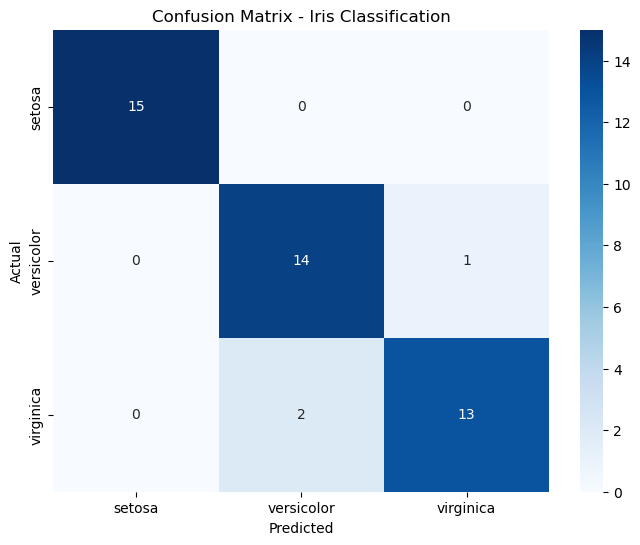

In [3]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Iris Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


                     setosa  versicolor  virginica
sepal length (cm) -0.545084    0.421168   0.123916
sepal width (cm)   0.764451   -0.427117  -0.337334
petal length (cm) -2.228941   -0.100465   2.329406
petal width (cm)  -0.974578   -0.838781   1.813358


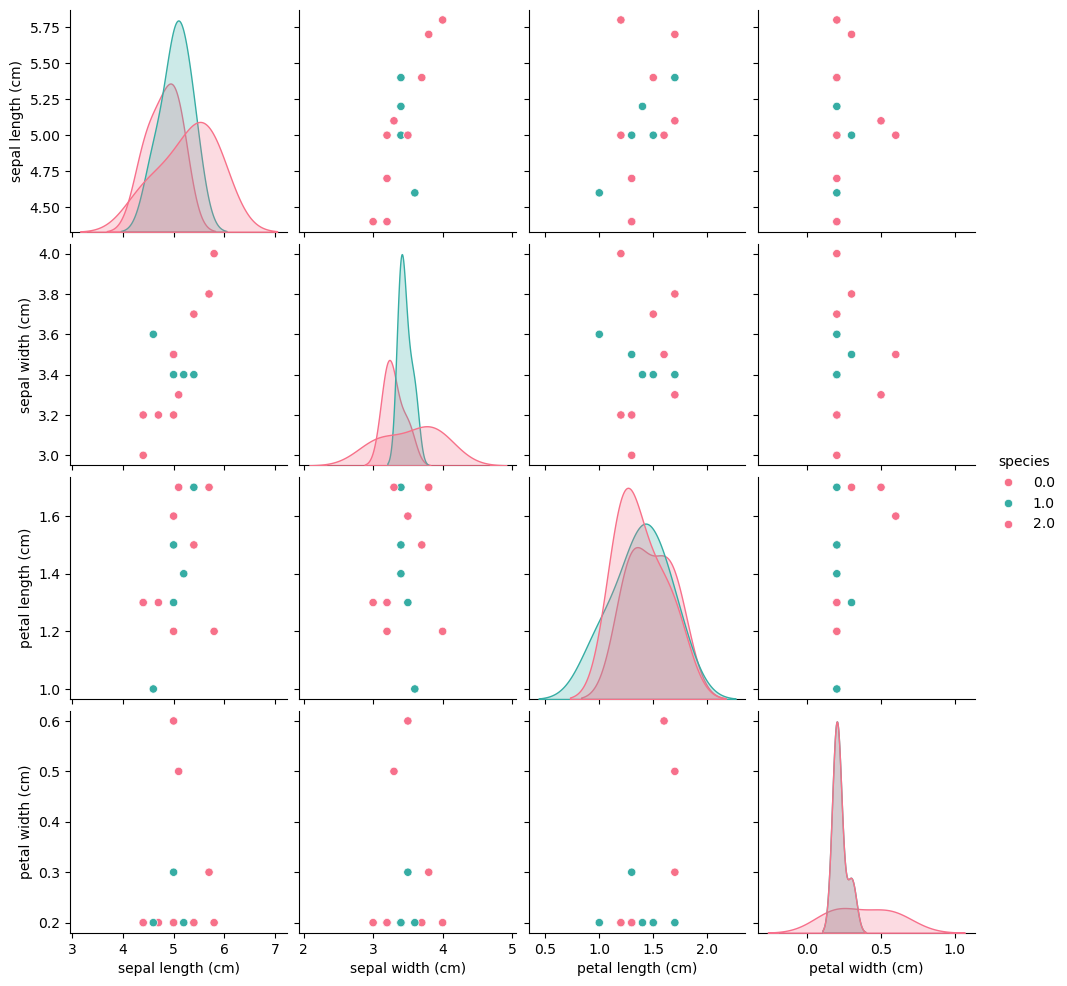

In [4]:
# Feature coefficients (per class)
coef_df = pd.DataFrame(clf.coef_.T, columns=iris.target_names, index=iris.feature_names)
print(coef_df)

# Pairplot of features colored by true class
sns.pairplot(pd.concat([X_test, pd.Series(y_test, name='species')], axis=1), 
             hue='species', palette='husl')
plt.show()
